<a href="https://colab.research.google.com/github/restrepo/calculus/blob/master/Differential_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Numerical derivative
## straight line equations
Consider the following straight line:
$$ y=3x\,, $$
with two benchmark points $(x_1,y_1)=(1,3)$, $(x_2,y_2)=(3,9)$. 

From the general equation
$$y=mx+b\,,$$
we can can calculate the _slope_ $m$ and the _intercept_ $b$ if we know two points. The _slope_ $m$ can be calculated as
$$m=\frac{y_2-y_1}{x_2-x_1}=\frac{9-3}{3-1}=\frac{6}{2}=3\,,$$
while the intercept $b$ is obtained from just one of the benchmark points from
\begin{align}
b=y-mx\,,\qquad\qquad (1)
\end{align}
e.g,
$$b=y_1-m x_1=3-3\times 1=0$$



## Passing one straight line trough a curve
Consider fig. 1 below.

[]

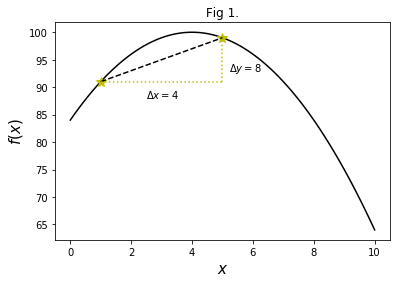

In [2]:
x100=np.linspace(0,10,100)
def f(x):
    if isinstance(x,list):
        x=np.array(x)
    return -(x-4)**2+100
plt.plot(x100,f(x100),'k-')
xs=np.array([1,5])
plt.plot(xs,f(xs),'y*',markersize=10)
plt.plot(xs,f(xs),'k--',markersize=10)
plt.title('Fig 1.')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.plot( xs,[f(xs[0]),f(xs[0])],'y:' )
plt.plot( [xs[1],xs[1]],f(xs),'y:' )
plt.text(2.5,88,r'$\Delta x={}$'.format(xs[1]-xs[0]))
plt.text(5.2,93,r'$\Delta y={}$'.format( f(xs[1])-f(xs[0])))
#plt.legend(loc='best')
plt.plot()

We want to define the _straigth line_ which passes for two points of some curve with some spacing $\Delta x$. We need the set of $x$-points, with some spacing $\Delta x$, the evaluation of some function $f(x)$ of those points, and the _slope_ of the straight line. The corresponding function, implementing eq.(1), is shown below 

In [0]:
def slope(x,y,m):
    '''
    Use the initial points `(x[0],y[0])` and the slope `m`
    to define an straight line as function of `x`:
      f(x)=mx+b
    '''
    x=np.asarray(x)
    y=np.asarray(y)
    b=y[0]-m*x[0]
    return m*x+b

As an example, let us use the two points with $\Delta x=4$ in Fig. 1. To find $m$ we can use the previuos two starred points

In [4]:
Δy=f(xs[1])-f(xs[0])
Δx=xs[1]-xs[0]
m=Δy/Δx
m

2.0

By using the `slope` function we have

Text(0.5, 0, '$x$')

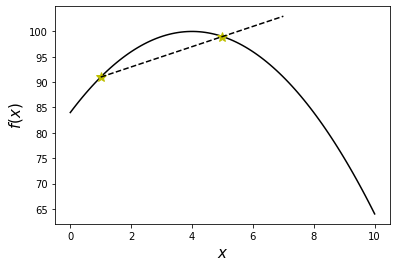

In [5]:
plt.plot(x100,f(x100),'k-')
xs=np.array([1,5])
plt.plot(xs,f(xs),'y*',markersize=10)
x=np.linspace(xs[0],7)
plt.plot(x,slope(x,f(x),m),'k--')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)

## Studying the changes along a curve
Let us start with a curve that do not change, which is just one straight line. 

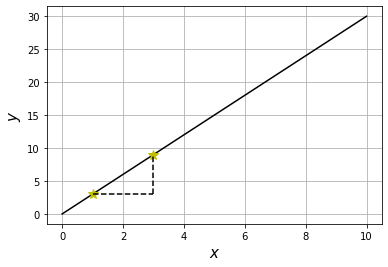

In [6]:
x=np.linspace(0,10,11)
def f(x):
    return 3*x

plt.plot(x,f(x),'k-')
plt.plot(1,f(1),'y*',markersize=10)
plt.plot(3,f(3),'y*',markersize=10)
plt.plot([1,f(1)],[3,f(1)],'k--')
plt.plot([3,f(1)],[3,f(3)],'k--')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
plt.grid()

The main property of the straight line is that the same _slope_ is constant for any pair of points on it. To illustrate this splicitly it is convenient to review the [slicing of a list in Python](https://railsware.com/blog/python-for-machine-learning-indexing-and-slicing-for-lists-tuples-strings-and-other-sequential-types/) [[Backup](https://web.archive.org/web/20190717104623/https://railsware.com/blog/python-for-machine-learning-indexing-and-slicing-for-lists-tuples-strings-and-other-sequential-types/)].

Let an array like the previous one created with `numpy` for $N=10$ points

In [7]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

The sequence of intitial $N-1=9$ points, $x_i$, is defined as all the points except by the last one:

In [8]:
x[:-1]

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

while the sequence of the final $N-1=9$ points, $x_{i+1}$, is defined as

In [9]:
x[1:]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

we can define the sequence of the $N-1=9$ differences between the final and intial points in $x$ as

In [10]:
Δx=x[1:]-x[:-1]
Δx

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

while the corresponding sequence of the $N-1=9$ differences between the final and intial points in $y$ is just

In [11]:
Δy=f(x[1:])-f(x[:-1])
Δy            

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

We can now check that the $N-1=9$ slopes are all the same

In [12]:
m=Δy/Δx
m

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

and we can rebuild the full function just by joining the $N-1=9$ straigth lines

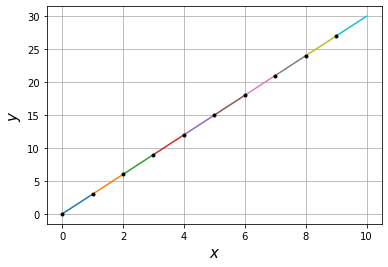

In [13]:
for i in range(Δx.size):
    plt.plot(x[i:i+2],slope(x[i:i+2],f(x[i:i+2]),m[i]) )
    
plt.plot(x[:-1],f(x[:-1]),'k.')
plt.xlabel('$x$',size=15)
plt.ylabel('$y$',size=15)
plt.grid()

Let us now to check the changes in the slope for the curve in Fig. 1 along $N=6$ points with same spacing $\Delta x$

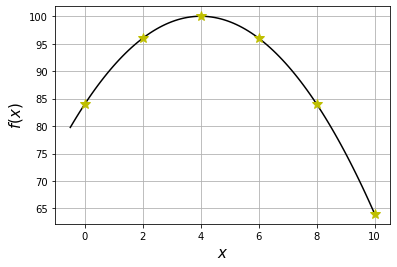

In [33]:
N=6
x100=np.linspace(-0.5,10,100)
x=np.linspace(0,10,6)
def f(x):
    if isinstance(x,list):
        x=np.array(x)
    return -(x-4)**2+100
plt.plot(x100,f(x100),'k-')
plt.plot(x,f(x),'y*',markersize=10)
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()

Now the slope is different for each one of the $N-1=5$ straight lines

In [34]:
x=np.linspace(0,10,N)
Δx=x[1:]-x[:-1]
Δy=f(x[1:])-f(x[:-1])
m=Δy/Δx
m

array([  6.,   2.,  -2.,  -6., -10.])

Moreover, the $N-1=5$ straigth lines, shown in colors below, are a good approach to the real curve shown as the dashed cyan curve below. 

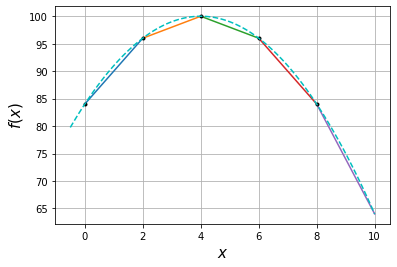

In [36]:
for i in range(Δx.size):
    plt.plot(x[i:i+2],slope(x[i:i+2],f(x[i:i+2]),m[i]) )
    
plt.plot(x[:-1],f(x[:-1]),'k.')
plt.plot(x100,f(x100),'c--')
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)
plt.grid()

Note in fact that the dashed curve is really formed by 99 straight lines which are not longer visible by the naked eye. By zoomin around $x=4$

Text(0.5, 0, '$x$')

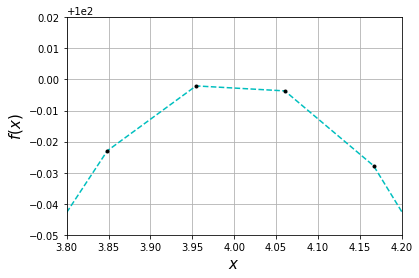

In [37]:
plt.plot(x100,f(x100),'c--')
plt.plot(x100,f(x100),'k.')
plt.grid()
plt.xlim(3.8,4.2)
plt.ylim(99.95,100.02)
plt.ylabel('$f(x)$',size=15)
plt.xlabel('$x$',size=15)